In [1]:
import sqlite3
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def load_data_from_db():
    
    """
    Load data so that each race is a separate sequence:
    X = [ [state1_race1, state2_race1, ...], [state1_race2, ...] ]
    Y = [ [next1_race1, next2_race1, ...], ... ]
    """
    conn = sqlite3.connect(
        "E:/pracadyp/Race-optimization-reinforcement-learning/data/db_states_for_regress/race_data_states_tests.db"
    )
    cursor = conn.cursor()
    cursor.execute("SELECT race_id, states_json FROM races ORDER BY race_id")
    rows = cursor.fetchall()
    conn.close()


    data = []

    for race_id, states_json in rows:
        states = json.loads(states_json)
        data.append(states)
    
    return data

In [3]:
def make_plots(data):
        history_array = np.array(data, dtype=float)
        
        # Utworzenie większej figury dla wszystkich wykresów
        fig = plt.figure(figsize=(8.27, 11.69))  # Format A4 pionowy

        # Konwersja sin/cos (idx 0,1) na znormalizowaną wartość LAP_DIST
        sin_vals = history_array[:, 0]
        cos_vals = history_array[:, 1]
        LAP_DIST_norm = (np.arctan2(sin_vals, cos_vals) + 2 * np.pi) % (2 * np.pi) / (2 * np.pi)
        
        # Zastąp idx 0 znormalizowaną wartością, wywal idx 1 (cos)
        history_array = np.hstack([
            LAP_DIST_norm.reshape(-1, 1),  # Nowa kolumna 0
            history_array[:, 2:]            # Reszta od idx 2 dalej (pomijamy sin i cos)
        ])
        
        
        
        # 1. Lap Distance
        plt.subplot(6, 3, 1)
        plt.plot(history_array[:, 0], label='Postęp okrążenia', color='blue')
        plt.title('Postęp okrążenia')
        plt.xlabel('Krok symulacji')
        plt.ylabel('Postęp')
        plt.legend(fontsize=7)
        plt.grid(True)

        # 2. Fuel Tank Capacity
        plt.subplot(6, 3, 2)
        plt.plot(history_array[:, 1], label='Paliwo', color='green')
        plt.title('Poziom paliwa')
        plt.xlabel('Krok symulacji')
        plt.ylabel('Wartość')
        plt.legend(fontsize=7)
        plt.grid(True)

        plt.subplot(6, 3, 3)
        plt.plot(history_array[:, 2], label='Wilgotność nawierzchni', color='purple')
        plt.title('Wilgotność nawierzchni')
        plt.xlabel('Krok symulacji')
        plt.ylabel('Wartość')
        plt.legend(fontsize=7)
        plt.grid(True)


        # 3-6. Wheel Wear (all 4 wheels)
        plt.subplot(6, 3, 4)
        plt.plot(history_array[:, 3], label='Opona 1')
        plt.plot(history_array[:, 4], label='Opona 2')
        plt.plot(history_array[:, 5], label='Opona 3')
        plt.plot(history_array[:, 6], label='Opona 4')
        plt.title('Zużycie opon')
        plt.xlabel('Krok symulacji')
        plt.ylabel('Zużycie')
        plt.legend(fontsize=7)
        plt.grid(True)


        
        plt.subplot(6, 3, 5)
        plt.plot(history_array[:, 7], label='Postęp wyścigu', color='orange')
        plt.title('Postęp wyścigu')
        plt.xlabel('Krok symulacji')
        plt.ylabel('Postęp')
        plt.legend(fontsize=7)
        plt.grid(True)

         # 13. Refueled Amount
        # plt.subplot(6, 7, 6)
        # plt.plot(history_array[:, 8], label='Ilość zatankowanego paliwa', color='orange')
        # plt.title('Ilość zatankowanego paliwa')
        # plt.xlabel('Krok symulacji')
        # plt.ylabel('litry')
        # plt.legend()
        # plt.grid(True)

        # 16. Raining
        plt.subplot(6, 3, 6)
        plt.plot(history_array[:, 9], label='Opady', color='skyblue')
        plt.title('Natężenie opadów')
        plt.xlabel('Krok symulacji')
        plt.ylabel('Wartość')
        plt.legend(fontsize=7)
        plt.grid(True)

         # 19. Impact flag
        plt.subplot(6, 3, 7)
        plt.plot(history_array[:, 10], label='Flaga uderzenia', color='gray')
        plt.title('Flaga uderzenia')
        plt.xlabel('Krok symulacji')
        plt.ylabel('Flaga')
        plt.legend(fontsize=7)
        plt.grid(True)

        # 33. In Pits
        plt.subplot(6, 3, 8)
        plt.plot(history_array[:, 11], label='W alei serwisowej', color='magenta')
        plt.title('Status w alei serwisowej')
        plt.xlabel('Krok symulacji')
        plt.ylabel('0/1')
        plt.legend(fontsize=7)
        plt.grid(True)

         # 36. Changed Tires Flag
        plt.subplot(6, 3, 9)
        plt.plot(history_array[:, 12], label='Wymiana opon', color='lime')
        plt.title('Flaga wymiany opon')
        plt.xlabel('Krok symulacji')
        plt.ylabel('0/1')
        plt.legend(fontsize=7)
        plt.grid(True)

        # 37. Is Repairing Flag
        plt.subplot(6, 3, 10)
        plt.plot(history_array[:, 13], label='Naprawa', color='salmon')
        plt.title('Flaga naprawy')
        plt.xlabel('Krok symulacji')
        plt.ylabel('0/1')
        plt.legend(fontsize=7)
        plt.grid(True)

        # 15. Num Penalties
        # plt.subplot(5, 4, 11)
        # plt.plot(history_array[:, 14], label='Kary', color='black')
        # plt.title('Liczba kar')
        # plt.xlabel('Krok symulacji')
        # plt.ylabel('Liczba')
        # plt.legend()
        # plt.grid(True)

        # 20-27. Dent Severity (all 8 dents)
        plt.subplot(6, 3, 11)
        for i in range(8):
            plt.plot(history_array[:, 15 + i], label=f'Element {i}')
        plt.title('Uszkodzenia pojazdu')
        plt.xlabel('Krok symulacji')
        plt.ylabel('Stopień uszkodzenia')
        plt.legend(fontsize=6)
        plt.grid(True)

        # 30. Total Laps
        plt.subplot(6, 3, 12)
        plt.plot(history_array[:, 23], label='Łączna liczba okrążeń', color='navy')
        plt.title('Łączna liczba okrążeń')
        plt.xlabel('Krok symulacji')
        plt.ylabel('Okrążenia')
        plt.legend(fontsize=7)
        plt.grid(True)

       

        # 31. Sector
        plt.subplot(6, 3, 13)
        plt.plot(history_array[:, 24], label='Sektor', color='green')
        plt.title('Sektor')
        plt.xlabel('Krok symulacji')
        plt.ylabel('Sektor (0/1/2)')
        plt.legend(fontsize=7)
        plt.grid(True)

          # 32. Num Pitstops
        plt.subplot(6, 3, 14)
        plt.plot(history_array[:, 25], label='Liczba pit stopów', color='olive')
        plt.title('Liczba pit stopów')
        plt.xlabel('Krok symulacji')
        plt.ylabel('Liczba')
        plt.legend(fontsize=7)
        plt.grid(True)

         # 34. Tire Compound Index
        plt.subplot(6, 3, 15)
        plt.plot(history_array[:, 26], label='Mieszanka opon', color='teal')
        plt.title('Indeks mieszanki opon')
        plt.xlabel('Krok symulacji')
        plt.ylabel('Indeks')
        plt.legend(fontsize=7)
        plt.grid(True)

        #  # 35. Usage Multiplier
        # plt.subplot(6, 7, 18)
        # plt.plot(history_array[:, 27], label='Mnożnik zużycia', color='coral')
        # plt.title('Mnożnik zużycia')
        # plt.xlabel('Krok symulacji')
        # plt.ylabel('Mnożnik')
        # plt.legend()
        # plt.grid(True)


        # 7-10. Wheel Temperature (all 4 wheels)
        plt.subplot(6, 3, 16)
        plt.plot(history_array[:, 28], label='Opona 1')
        plt.plot(history_array[:, 29], label='Opona 2')
        plt.plot(history_array[:, 30], label='Opona 3')
        plt.plot(history_array[:, 31], label='Opona 4')
        plt.title('Temperatura opon')
        plt.xlabel('Krok symulacji')
        plt.ylabel('Temp. (°C)')
        plt.legend(fontsize=7)
        plt.grid(True)

        # 11. Path Wetness
        

        # 12. Current Step Ratio
        

       

        # 14. Last Impact Magnitude
        # plt.subplot(6, 7, 20)
        # plt.plot(history_array[:, 32], label='Siła uderzenia', color='darkred')
        # plt.title('Siła ostatniego uderzenia')
        # plt.xlabel('Krok symulacji')
        # plt.ylabel('Siła')
        # plt.legend()
        # plt.grid(True)

        

        

        # 17. Ambient Temperature
        plt.subplot(6, 3, 17)
        plt.plot(history_array[:, 33], label='Temp. otoczenia', color='brown')
        plt.title('Temperatura otoczenia')
        plt.xlabel('Krok symulacji')
        plt.ylabel('Temp. (°C)')
        plt.legend(fontsize=7)
        plt.grid(True)

        # 18. Track Temperature
        plt.subplot(6, 3, 18)
        plt.plot(history_array[:, 34], label='Temp. toru', color='cyan')
        plt.title('Temperatura toru')
        plt.xlabel('Krok symulacji')
        plt.ylabel('Temp. (°C)')
        plt.legend(fontsize=7)
        plt.grid(True)

        # 19. End ET
        # plt.subplot(6, 7, 23)
        # plt.plot(history_array[:, 35], label='Koniec ET', color='gray')
        # plt.title('Koniec ET')
        # plt.xlabel('Krok symulacji')
        # plt.ylabel('ET')
        # plt.legend()
        # plt.grid(True)

        plt.tight_layout()
        # plt.savefig(f'ai/rl_training_race_historyplots/race_history_plots_{self.num_race}.png', dpi=150)
        plt.show(fig)
        plt.close(fig)

def make_plots_impacts(data):
      history_array = np.array(data)
      
      # Utworzenie większej figury dla wszystkich wykresów
      fig = plt.figure(figsize=(20, 5))
      plt.subplot(1, 3, 1)
      plt.plot(history_array[:, 11], label='Flaga uderzenia', color='gray')
      plt.title('Flaga uderzenia')
      plt.xlabel('Krok symulacji')
      plt.ylabel('Flaga')
      plt.legend()
      plt.grid(True)
      
      # 14. Last Impact Magnitude
      plt.subplot(1, 3, 2)
      plt.plot(history_array[:, 33], label='Siła uderzenia', color='darkred')
      plt.title('Siła uderzenia')
      plt.xlabel('Krok symulacji')
      plt.ylabel('Siła [N]')
      plt.legend()
      plt.grid(True)
      
      plt.subplot(1, 3, 3)
      for i in range(8):
          plt.plot(history_array[:, 16 + i], label=f'Element {i}')
      plt.title('Uszkodzenia pojazzdu')
      plt.xlabel('Krok symulacji')
      plt.ylabel('Stopień uszkodzenia')
      plt.legend(fontsize=6)
      plt.grid(True)

def make_plots_weather(data):
      history_array = np.array(data)
      
      # Utworzenie większej figury dla wszystkich wykresów
      fig = plt.figure(figsize=(20, 5))
      plt.subplot(1, 4, 1)
      plt.plot(history_array[:, 3], label='Wilgotność nawierzchni', color='purple')
      plt.title('Wilgotność nawierzchni')
      plt.xlabel('Krok symulacji')
      plt.ylabel('Wartość')
      plt.legend()
      plt.grid(True)

      plt.subplot(1, 4, 2)
      plt.plot(history_array[:, 10], label='Natężenie opadów', color='blue')
      plt.title('Natężenie opadów')
      plt.xlabel('Krok symulacji')
      plt.ylabel('Wartość')
      plt.legend()
      plt.grid(True)
      
      # 17. Ambient Temperature
      plt.subplot(1, 4, 3)
      plt.plot(history_array[:, 34], label='Temperatura otoczenia', color='brown')
      plt.title('Temperatura otoczenia')
      plt.xlabel('Krok symulacji')
      plt.ylabel('Temperatura [°C]')
      plt.legend()
      plt.grid(True)

      plt.subplot(1, 4, 4)
      plt.plot(history_array[:, 35], label='Temperatura toru', color='cyan')
      plt.title('Temperatura toru')
      plt.xlabel('Krok symulacji')
      plt.ylabel('Temperatura [°C]')
      plt.legend()
      plt.grid(True)

      plt.tight_layout()
      plt.show(fig)
      

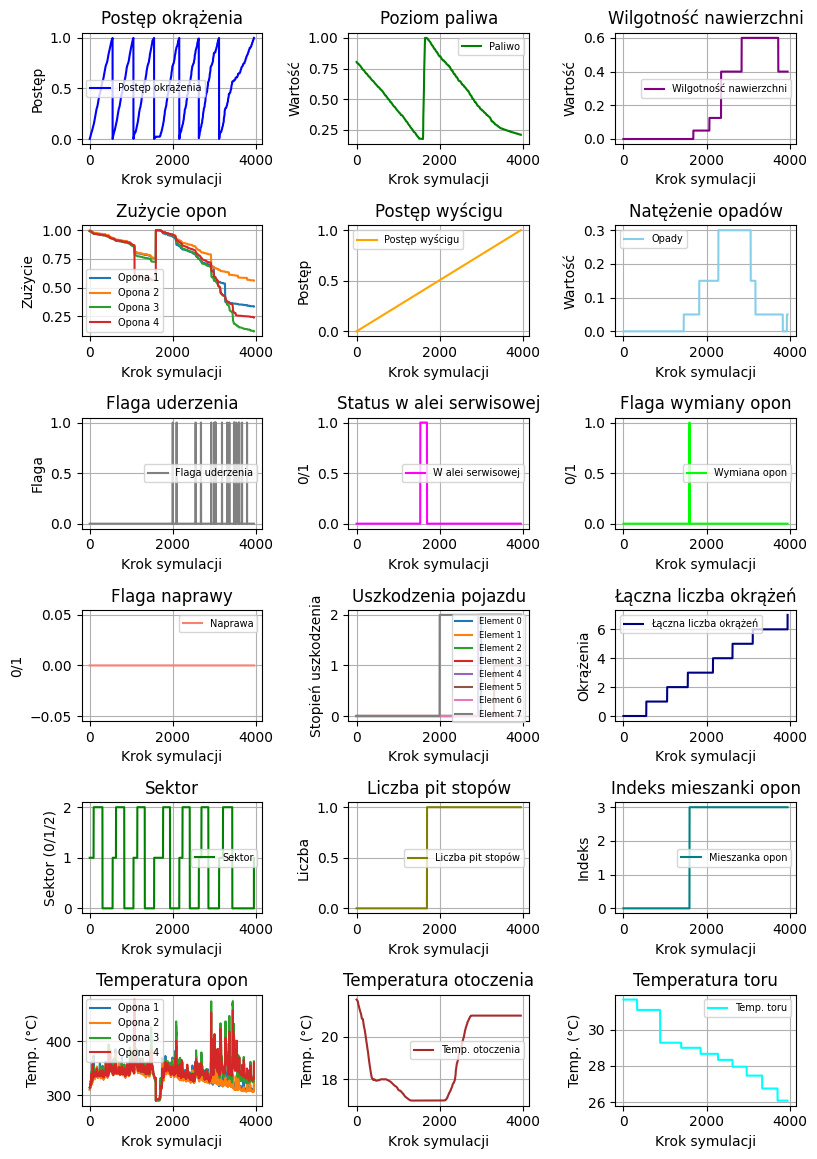

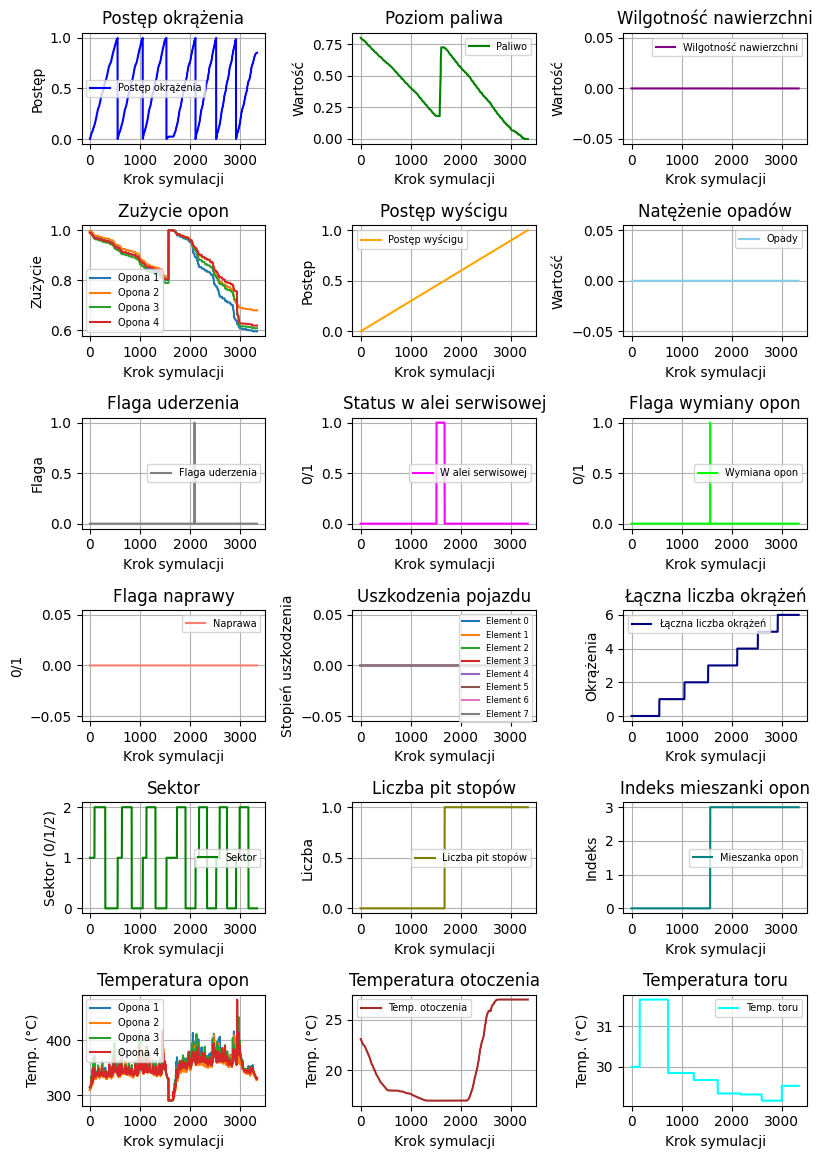

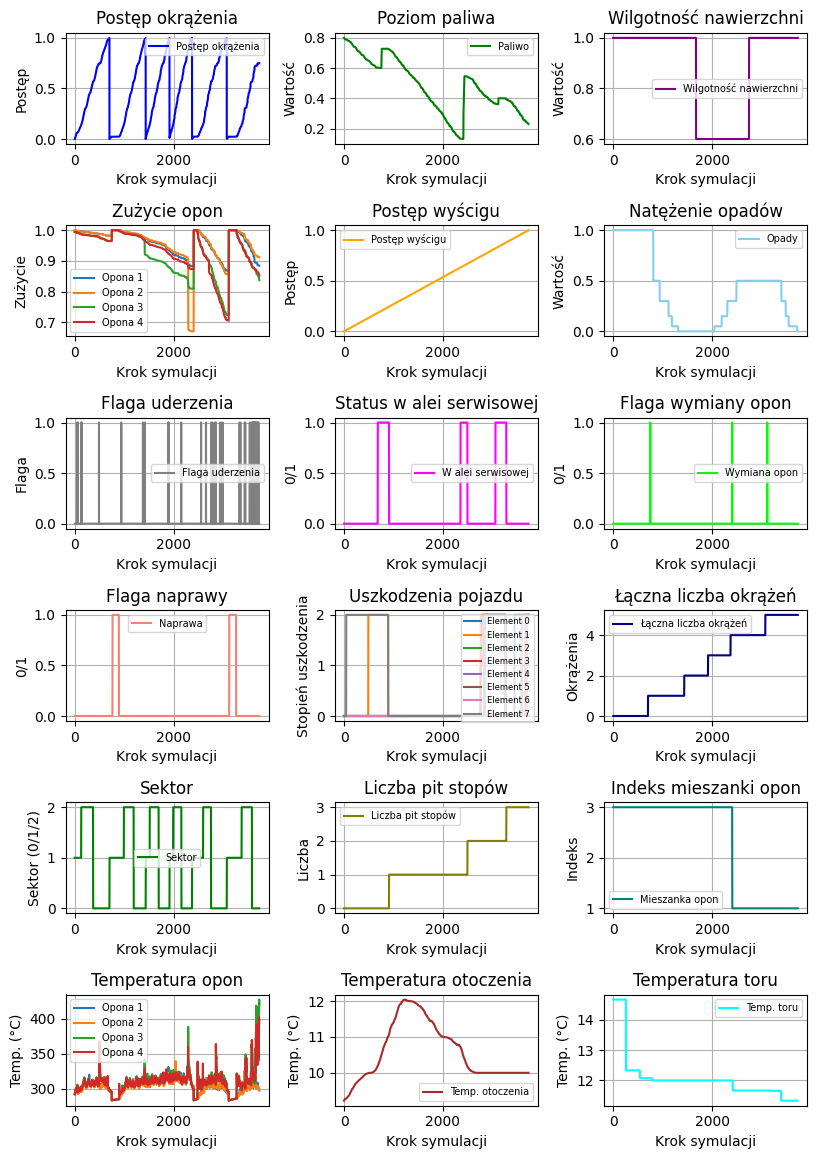

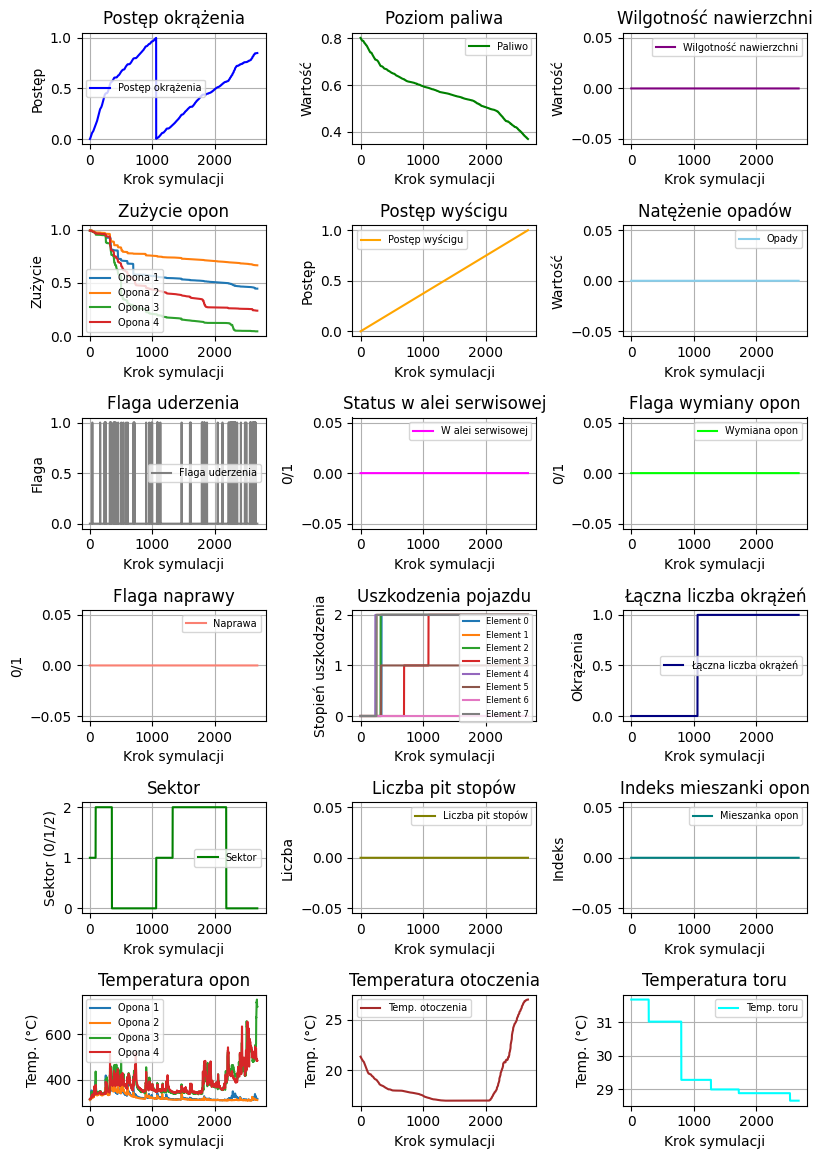

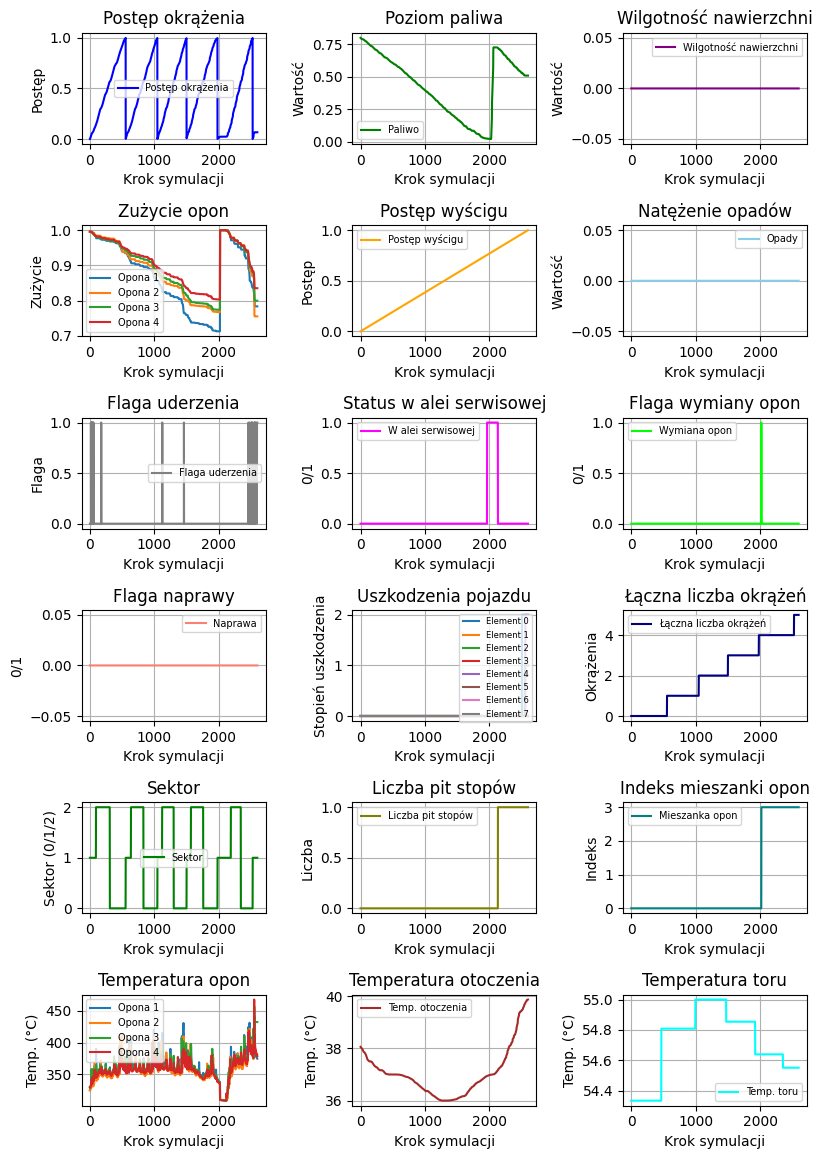

In [4]:
data = load_data_from_db()

for race in data:
    make_plots(race)